# **REGRESSÃO QUANTÍLICA**

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Carrega a base de dados
from google.colab import files
uploaded = files.upload()

Saving gasto_almoco.xlsx to gasto_almoco.xlsx


In [3]:
gasto = pd.read_excel('gasto_almoco.xlsx')

## **ANÁLISE INICIAL**

In [4]:
gasto.head(64)

,dia,gasto_dia_reais,num_refeicoes,gasto_acum_reais
0,1,26,1,26
1,2,18,2,44
2,3,37,3,81
3,4,21,4,102
4,5,39,5,141
...,...,...,...,...
59,60,33,60,1826
60,61,38,61,1864
61,62,122,66,1986
62,63,34,67,2020


In [5]:
gasto.shape

(64, 4)

**Valores Missing**

In [6]:
gasto.isnull().sum()

dia                 0
gasto_dia_reais     0
num_refeicoes       0
gasto_acum_reais    0
dtype: int64

In [7]:
# Análise dos tipos de atributos.
gasto.dtypes

dia                 int64
gasto_dia_reais     int64
num_refeicoes       int64
gasto_acum_reais    int64
dtype: object

**Análise da correlação linear**

In [8]:
import matplotlib.pyplot as plt

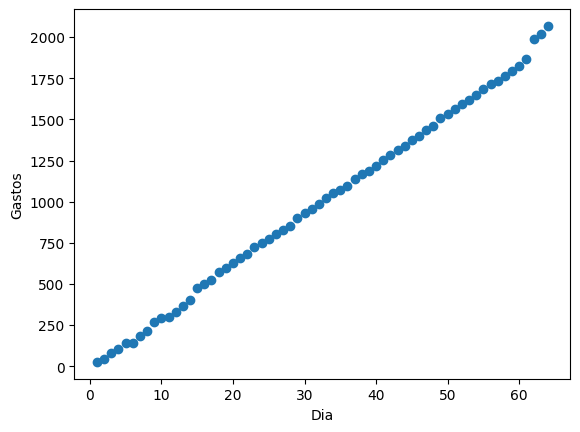

In [9]:
plt.scatter(gasto.dia,gasto.gasto_acum_reais)
plt.xlabel('Dia')
plt.ylabel('Gastos')
plt.grid(False)
plt.show()

**Análise da Normalidade**

Gráfico QQ-Plot

In [10]:
import scipy.stats as stats

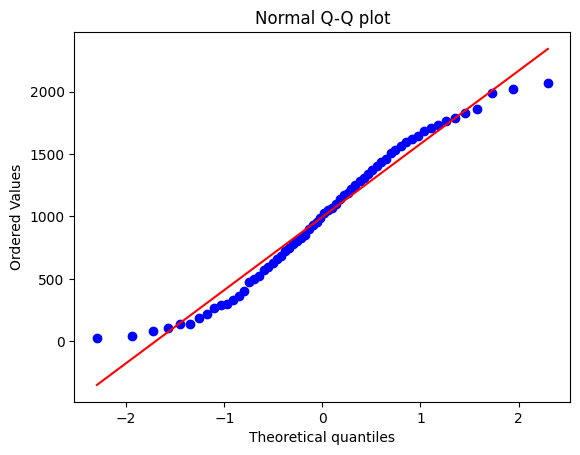

In [11]:
stats.probplot(gasto['gasto_acum_reais'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [12]:
stats.shapiro(gasto.gasto_acum_reais)

ShapiroResult(statistic=0.9621436595916748, pvalue=0.047125596553087234)

In [13]:
estatistica, p = stats.shapiro(gasto.gasto_acum_reais)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9621436595916748
p-valor: 0.047125596553087234


**Correlação Linear**

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [14]:
# Pearson
coef,p = stats.pearsonr(gasto.dia,gasto.gasto_acum_reais)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.9991907427078194
p-valor: 3.030401482844131e-88


In [15]:
# Spearman
coef,p = stats.spearmanr(gasto.dia,gasto.gasto_acum_reais)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.9999885530480366
p-valor: 1.4296719644744235e-145


## **MODELO DE REGRESSÃO LINEAR**

In [16]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [17]:
# Criação do modelo
regressao_linear = smf.ols('gasto_acum_reais ~ dia', data = gasto).fit()

In [18]:
residuos = regressao_linear.resid

**Teste de Normalidade dos resíduos**

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [19]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.8646502494812012
p-valor: 4.71544126412482e-06


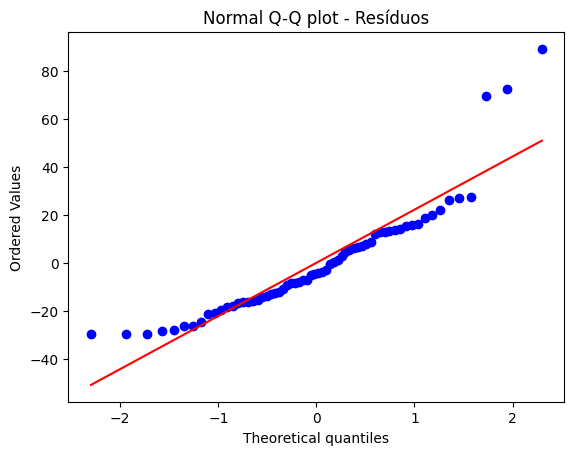

In [20]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

**Análise da Homocedasticidade dos resíduos**
(resíduos com variação constante)  

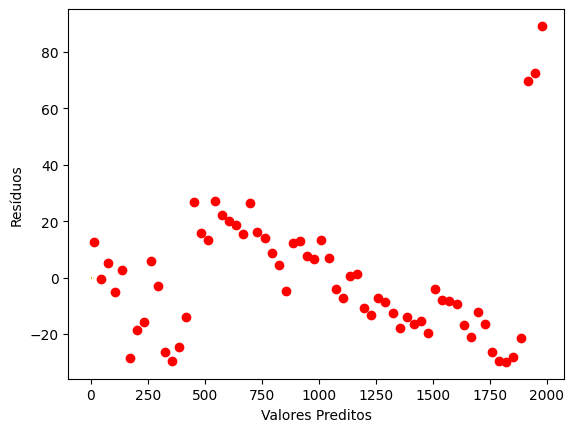

In [21]:
plt.scatter(y=residuos, x=regressao_linear.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=4, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [22]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [23]:
estatistica, p, f, fp = sms.het_breuschpagan (regressao_linear.resid, regressao_linear.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 8.551798019780456
p-valor: 0.0034518111668789633
f-valor: 9.562284407626684
f_p-valor: 0.0029756698764907595


**Outliers nos resíduos**

(Entre -3 e 3)

In [24]:
outliers = regressao_linear.outlier_test()

In [25]:
outliers.max()

student_resid    4.458242
unadj_p          0.982688
bonf(p)          1.000000
dtype: float64

In [26]:
outliers.min()

student_resid   -1.305146
unadj_p          0.000036
bonf(p)          0.002309
dtype: float64

**Modelo Reprovado: Resíduos sem distribuição normal, com presença de outliers e presença de heterocedasticidade**

## **MODELO DE REGRESSÃO QUANTÍLICA**

In [27]:
modelo1 = smf.quantreg('gasto_acum_reais ~ dia', gasto)
resultado = modelo1.fit(q=0.25)
print(resultado.summary())

                         QuantReg Regression Results                          
Dep. Variable:       gasto_acum_reais   Pseudo R-squared:               0.9705
Model:                       QuantReg   Bandwidth:                       19.83
Method:                 Least Squares   Sparsity:                        52.15
Date:                Sun, 28 Apr 2024   No. Observations:                   64
Time:                        22:57:17   Df Residuals:                       62
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7143      6.536     -3.322      0.002     -34.780      -8.648
dia           30.9286      0.181    171.127      0.000      30.567      31.290


**Equação:** gasto_acum = - 21,7143 + 30,9286 * dia

In [28]:
modelo2 = smf.quantreg('gasto_acum_reais ~ dia', gasto)
resultado = modelo2.fit(q=0.5)
print(resultado.summary())

                         QuantReg Regression Results                          
Dep. Variable:       gasto_acum_reais   Pseudo R-squared:               0.9691
Model:                       QuantReg   Bandwidth:                       19.52
Method:                 Least Squares   Sparsity:                        43.96
Date:                Sun, 28 Apr 2024   No. Observations:                   64
Time:                        22:57:18   Df Residuals:                       62
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0313      5.560     -1.445      0.154     -19.145       3.082
dia           30.7813      0.149    206.976      0.000      30.484      31.079


**Equação:** gasto_acum = - 8,0313 + 30,7813 * dia

In [29]:
modelo3 = smf.quantreg('gasto_acum_reais ~ dia', gasto)
resultado = modelo3.fit(q=0.75)
print(resultado.summary())

                         QuantReg Regression Results                          
Dep. Variable:       gasto_acum_reais   Pseudo R-squared:               0.9624
Model:                       QuantReg   Bandwidth:                       15.65
Method:                 Least Squares   Sparsity:                        45.18
Date:                Sun, 28 Apr 2024   No. Observations:                   64
Time:                        22:57:19   Df Residuals:                       62
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4074      4.735      2.831      0.006       3.942      22.873
dia           30.4815      0.124    246.731      0.000      30.235      30.728


**Equação:** gasto_acum = 13,4074 + 30,4815 * dia

In [30]:
modelo4 = smf.quantreg('gasto_acum_reais ~ dia', gasto)
resultado = modelo4.fit(q=0.85)
print(resultado.summary())

                         QuantReg Regression Results                          
Dep. Variable:       gasto_acum_reais   Pseudo R-squared:               0.9537
Model:                       QuantReg   Bandwidth:                       27.08
Method:                 Least Squares   Sparsity:                        94.22
Date:                Sun, 28 Apr 2024   No. Observations:                   64
Time:                        22:57:19   Df Residuals:                       62
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4000     10.507     -0.514      0.609     -26.403      15.603
dia           31.4000      0.276    113.865      0.000      30.849      31.951


**Equação:** gasto_acum = - 5,4 + 31,4 * dia

In [31]:
modelo5 = smf.quantreg('gasto_acum_reais ~ dia', gasto)
resultado = modelo5.fit(q=0.99999)
print(resultado.summary())

                         QuantReg Regression Results                          
Dep. Variable:       gasto_acum_reais   Pseudo R-squared:               0.9545
Model:                       QuantReg   Bandwidth:                         nan
Method:                 Least Squares   Sparsity:                          nan
Date:                Sun, 28 Apr 2024   No. Observations:                   64
Time:                        22:57:20   Df Residuals:                       62
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4127        nan        nan        nan         nan         nan
dia           32.4127        nan        nan        nan         nan         nan


**Equação:** gasto_acum = - 6,4127 + 32,4127 * dia

**Comparando com a regressão linear**

In [32]:
print(regressao_linear.summary())

                            OLS Regression Results                            
Dep. Variable:       gasto_acum_reais   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.826e+04
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           3.03e-88
Time:                        22:57:21   Log-Likelihood:                -292.04
No. Observations:                  64   AIC:                             588.1
Df Residuals:                      62   BIC:                             592.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.8542      5.963     -2.994      0.0

**Equação:** gasto_acum = - 17,8542 + 31,1984 * dia